In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [2]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [4]:
# Initialising the ANN
classifier = Sequential()

In [5]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [7]:
classifier.add(Dense(6, kernel_initializer='he_uniform', activation='relu'))

In [8]:
classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))


In [9]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs= 100)


Epoch 1/100
536/536 [==============================] - 5s 3ms/step - loss: 0.5843 - accuracy: 0.7984 - val_loss: 0.5394 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7959 - val_loss: 0.5111 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4953 - accuracy: 0.8011 - val_loss: 0.4965 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4822 - accuracy: 0.8016 - val_loss: 0.4877 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4767 - accuracy: 0.7981 - val_loss: 0.4812 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4758 - accuracy: 0.7908 - val_loss: 0.4757 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4777 - accuracy: 0.7915 - val_loss: 0.4713 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3494 - accuracy: 0.8524 - val_loss: 0.3862 - val_accuracy: 0.8304
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3587 - accuracy: 0.8481 - val_loss: 0.3853 - val_accuracy: 0.8300
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3481 - accuracy: 0.8605 - val_loss: 0.3844 - val_accuracy: 0.8319
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3530 - accuracy: 0.8512 - val_loss: 0.3833 - val_accuracy: 0.8323
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3578 - accuracy: 0.8507 - val_loss: 0.3829 - val_accuracy: 0.8334
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3536 - accuracy: 0.8483 - val_loss: 0.3813 - val_accuracy: 0.8345
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3437 - accuracy: 0.8517 - val_loss: 0.3806 - val_accuracy:

In [15]:
print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


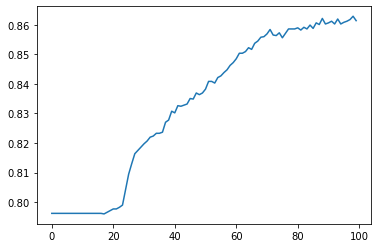

In [17]:
plt.plot(model_history.history['accuracy'])

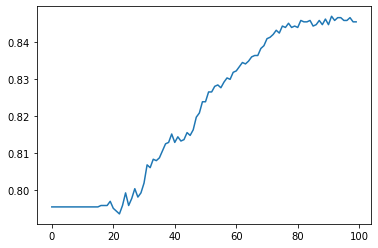

In [18]:
plt.plot(model_history.history['val_accuracy'])


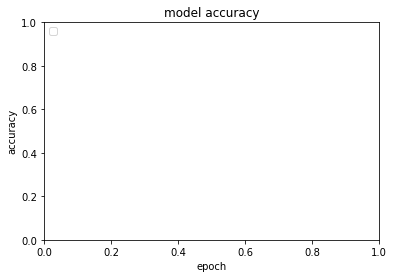

In [19]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


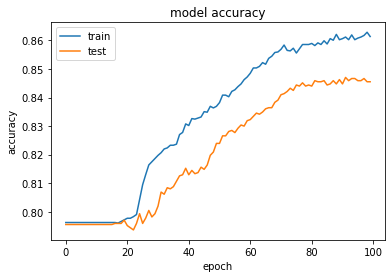

In [20]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [24]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1513   82]
 [ 201  204]]


In [26]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.8585
